# Importing Libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Reading and Exploring file

In [15]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.drop(columns = ['customerID'], inplace = True)

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [20]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
df['TotalCharges'] = df['TotalCharges'].str.strip()

In [24]:
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Label Encoding 

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
df[cat_list]=df[cat_list].apply(lambda x:le.fit_transform(x))

In [68]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,1,2,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,0,3,56.95,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,1,3,53.85,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,0,0,42.30,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,1,2,70.70,1


# Feature Selection

In [69]:
y = df['Churn']
X = df.drop(['Churn'], axis = 1)

In [70]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [35]:
rows_with_na = df[df.isna().any(axis=1)]
rows_with_na

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,NaN,No
753,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,NaN,No
936,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,NaN,No
1082,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,NaN,No
1340,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,NaN,No
3331,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,NaN,No
3826,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,NaN,No
4380,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,NaN,No
5218,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,NaN,No
6670,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,NaN,No


In [37]:
df.dropna(inplace = True)

In [38]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [74]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [50]:
loj_model.intercept_      
loj_model.coef_  

array([[-0.05123072,  0.22635856, -0.35474616, -0.22411975, -0.98295822,
        -0.11407927,  0.30831557, -0.4788624 , -0.34136862, -0.2684517 ,
        -0.45573805, -0.10659979, -0.10999386,  0.41001375,  0.24492517,
         0.02689836]])

In [45]:
df_rev = df.drop(['Churn'], axis = 1)

# Correlation

<Axes: >

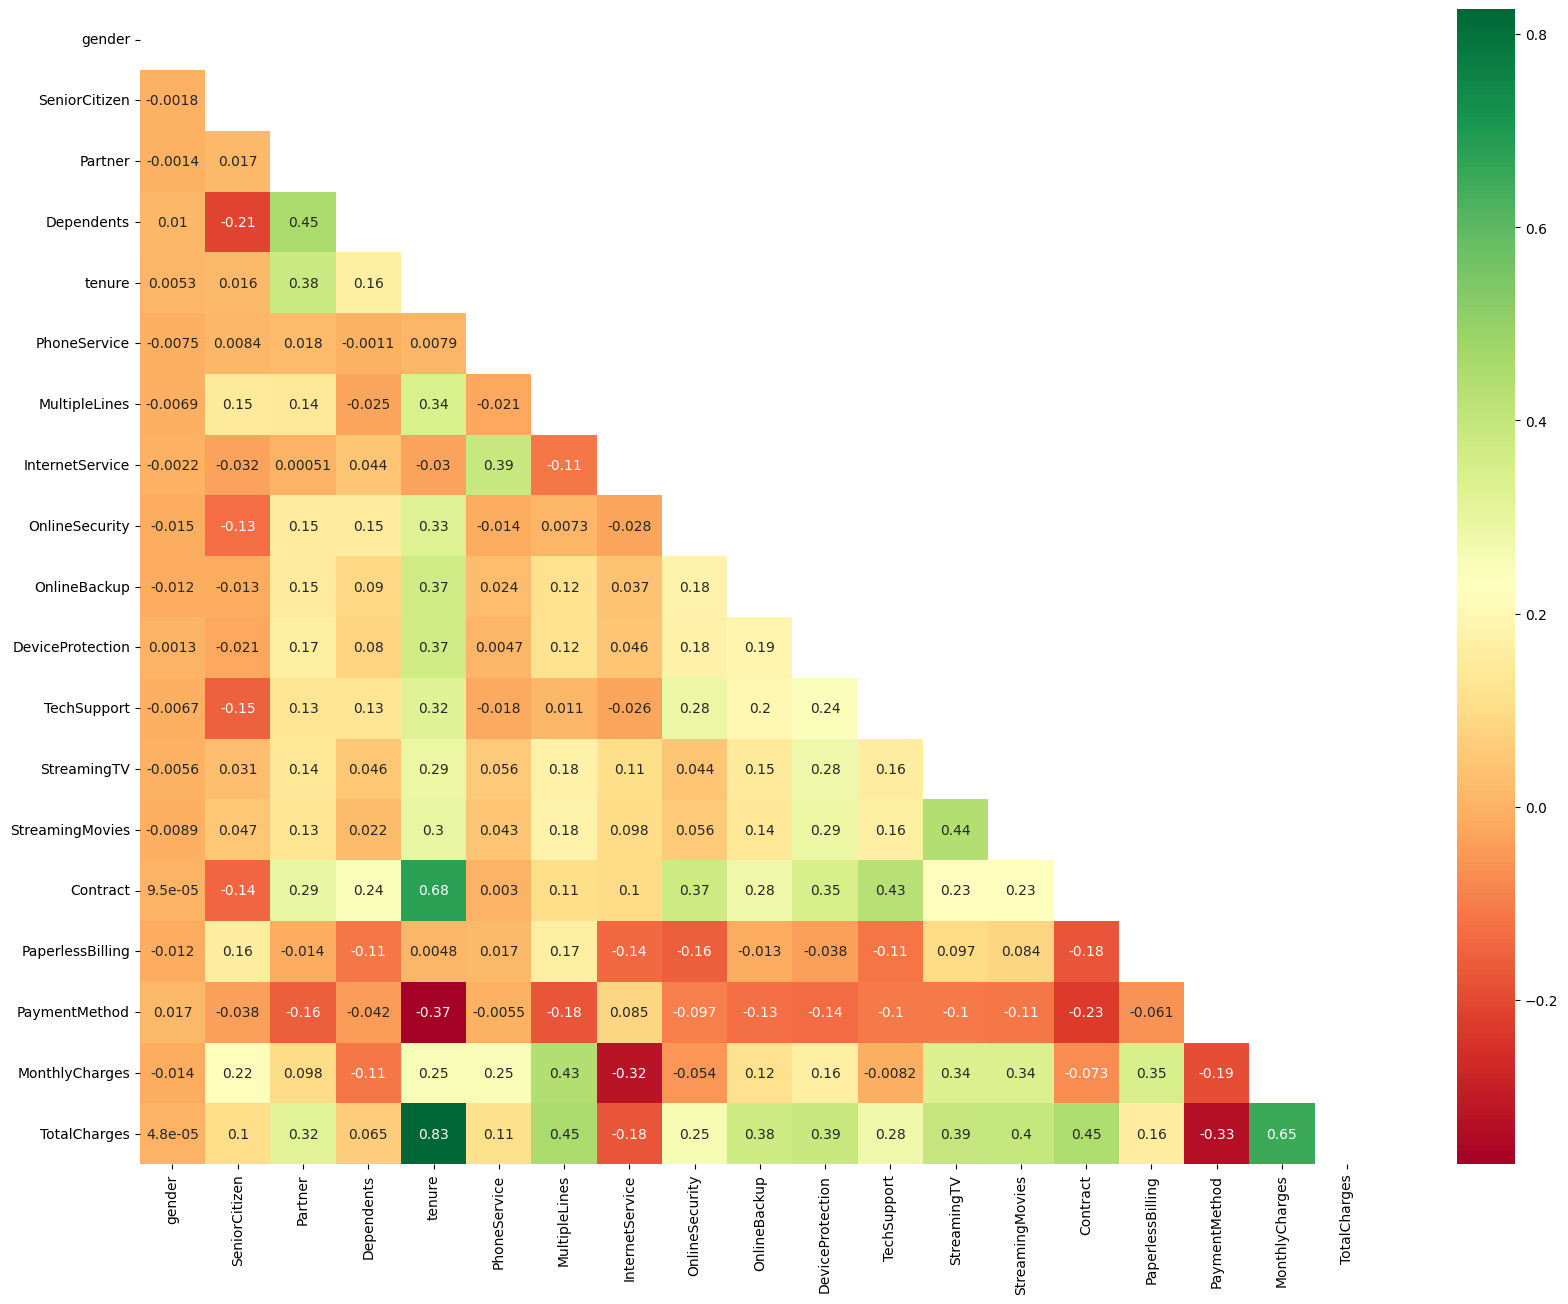

In [46]:
corr = df_rev.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

In [47]:
df.drop(columns=['TotalCharges', 'tenure', 'Contract'],inplace=True)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [53]:
y_pred = loj_model.predict(X)       
confusion_matrix(y, y_pred)  

array([[4677,  486],
       [1063,  806]])

In [54]:
accuracy_score(y, y_pred)

0.7797212741751991

In [55]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.91      0.86      5163
         Yes       0.62      0.43      0.51      1869

    accuracy                           0.78      7032
   macro avg       0.72      0.67      0.68      7032
weighted avg       0.76      0.78      0.77      7032



In [56]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.67279246, 0.32720754],
       [0.8226258 , 0.1773742 ],
       [0.79469224, 0.20530776],
       [0.93736059, 0.06263941],
       [0.29841107, 0.70158893],
       [0.39285335, 0.60714665],
       [0.57311347, 0.42688653],
       [0.69186697, 0.30813303],
       [0.6664921 , 0.3335079 ],
       [0.93465445, 0.06534555]])

In [57]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [58]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [59]:
y_pred[0:20]

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [65]:
confusion_matrix(y, y_pred)

array([[4677,  486],
       [1063,  806]])

In [66]:
accuracy_score(y, y_pred)

0.7797212741751991

In [72]:
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,1,2,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,0,3,56.95
2,1,0,0,0,1,0,0,2,2,0,0,0,0,1,3,53.85
3,1,0,0,0,0,1,0,2,0,2,2,0,0,0,0,42.30
4,0,0,0,0,1,0,1,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,3,84.80
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,103.20
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,1,2,29.60
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,1,3,74.40


In [73]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

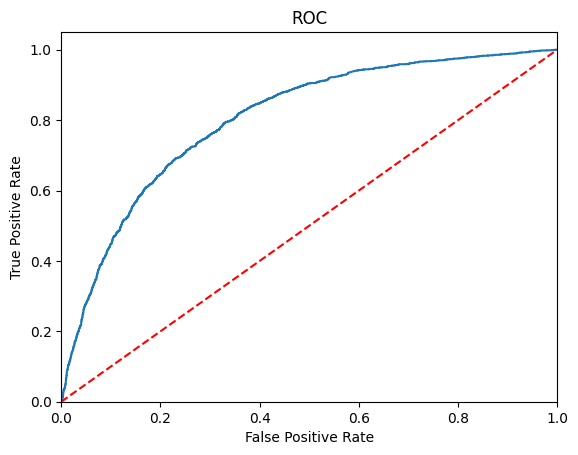

In [75]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [77]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [78]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7734597156398104

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

np.float64(0.7791469194312797)